### FINAL PROJECT
### Group: Abdelmalek Hajjam, Monu Chacko



# ------------------------------------------------------------------------------------------------------------------


# WE ARE STILL WORKING ON THIS PROJECT. WILL BE COMPLETED BY 12/22

# ---------------------------------------------------------------------------------------------------------------

For the final project we will use the knowledge gained in the class to analyze a dataset of comments for a given discussion. We will Take a discussion thread from reddit and analyze its comments. Reddit is a social news aggregation site, rating contents, and discussions. Registered members submit content to the site such as links, text posts, and images, which are then voted up or down by other members. This network can be analyzed to determine its sentiment and network itself.
Kaggle provides us many datasets that are collected from many places. It also includes comments data from reddit. We can use this dataset to do our analysis.
Reddit comments dataset https://www.kaggle.com/reddit/reddit-comments-may-2015 contains about 1.7 billion records. To perform analysis, kaggle provides us a smaller subset of data. We took that subset and reduced further to get a new subset of decent csv files that can be read and analyzed. All comments and users used in these 3 CSV files we are going to use, are coming from a single subreddit or subject, in this case it was "What is the strongest opinion you hold?".

In this project, we will use 2 parts. One part to study the network analysis where the nodes are the users and the edges between any 2 nodes are all the comments and recomments between any 2 users, and the other part to do sentimental analysis on the comments. So let's go!!!

In [1]:
import pandas as pd
#import pymysql
import matplotlib.pyplot as plt
import networkx as nx
import operator
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#read the file containing interactions between any 2 users and How many comments between the 2 users.
reddit = pd.read_csv('comments_grp_data.csv',sep=',')

#reading the comments themselves
reddit_comment = pd.read_csv('comments_data.csv',sep=';')

users = pd.read_csv('users_data.csv',sep=';')

In [3]:
reddit.loc[0:5]

,author,responder,weight
0,---DevilsAdvocate---,dannybtw,1
1,---DevilsAdvocate---,ThisFreaknGuy,2
2,-Covariance,DomeSlave,1
3,-Mountain-King-,ASK_ABOUT_STEELBEAMS,3
4,-Mountain-King-,AvoidNoiderman,2
5,-Mountain-King-,Bigfrostynugs,1


In [4]:
reddit.shape

(18701, 3)

In [5]:
reddit_comment.shape

(24134, 13)

In [6]:
users.shape

(9928, 3)

In [7]:
# Initialize graph
G = nx.Graph()

# Add nodes
nodes = set(reddit.loc[:, "author"])
nodes.union(set(reddit.loc[:, "responder"]))
nodes = list(nodes)
nodes
G.add_nodes_from(nodes)

# Add edges with weights
# Weight is equal to number of interactions between users
#G.add_edges_from([tuple(x) for x in reddit.loc[:, "author":"responder"].values])
G.add_weighted_edges_from([tuple(x) for x in reddit.values])

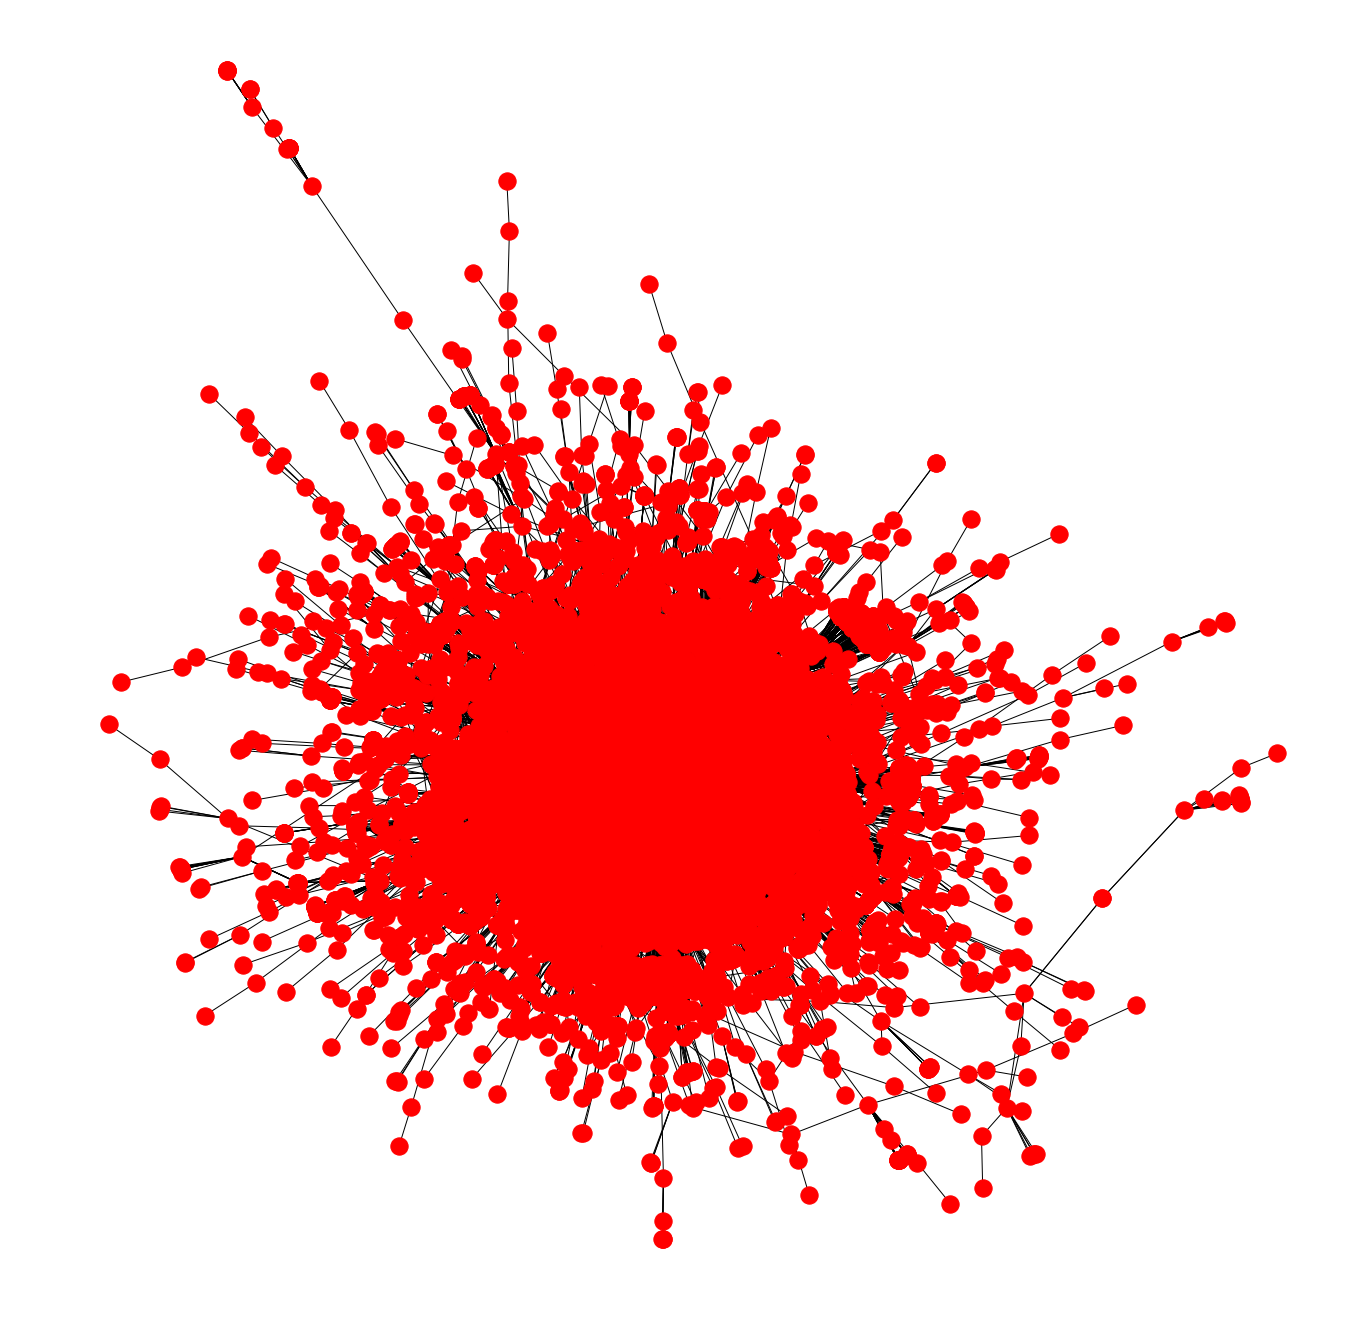

In [54]:
%matplotlib inline
fig = plt.figure(figsize=(18, 18))
nx.draw(G)
plt.show()

#### Let's check our Graph options in Gephi

<img src="networkdia1.png" />

<img src="networkdia2.png" />

#### Now that we have our graph, let's analyze it and reveal some of its properties

In [8]:
nx.number_of_nodes(G)

10233

In [9]:
G.number_of_edges()

15756

In [10]:
nx.number_connected_components(G)

129

In [11]:
# Ten largest subgraphs
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)[0:10]]

[9928, 9, 6, 5, 5, 5, 5, 5, 4, 4]

In [12]:
# Select the largest connected subgraph
G = max(nx.connected_component_subgraphs(G), key=len)
G.number_of_nodes()

9928

In [13]:
nx.diameter(G)

16

In [14]:
nx.average_shortest_path_length(G, weight='weight')

5.211905025136356

In [15]:
# Top 10 edges by weight
#for s, t, w in sorted(G.edges(data=True), key=lambda (source,target,data): data['weight'], reverse=True)[0:10]:
#    print(s, t, w)

In [16]:
'''
The following code was used to calculate centralities during first run
Betweenness centrality takes a long time to calculate 
As such we use saved values for further analysis
'''
# Calculate betweenness centrality
centr_bw = nx.betweenness_centrality(G, weight='weight')

# Calculate degree centrality
centr_deg = nx.degree_centrality(G)

# Combine betweenness and degree centralities into a single data frame
df1 = pd.DataFrame(list(centr_bw.items()), columns=['User', 'Betweenness'])
df2 = pd.DataFrame(list(centr_deg.items()), columns=['User', 'Degree'])
users = df1.join(df2.set_index('User'), on='User')
users.sort_values(['Betweenness', 'Degree'], ascending = False, inplace=True)


users[0:25]

,User,Betweenness,Degree
3996,CDC_,0.087609,0.035560
2929,corby315,0.074198,0.023471
1351,fundygud,0.051563,0.020248
3809,Lemonaxe,0.049766,0.021557
2349,bazzil350,0.049643,0.019845
3321,hawkish25,0.049423,0.017125
4211,Supersoakthatho,0.048042,0.017729
1559,FenrisCain,0.046511,0.018535
2172,ohitsali,0.045828,0.018535
2169,mstrdpncks,0.045789,0.017528


#### Let's check on a user and his interactions in the graph. In this case we check on user "corby315", the second user i  the above list.

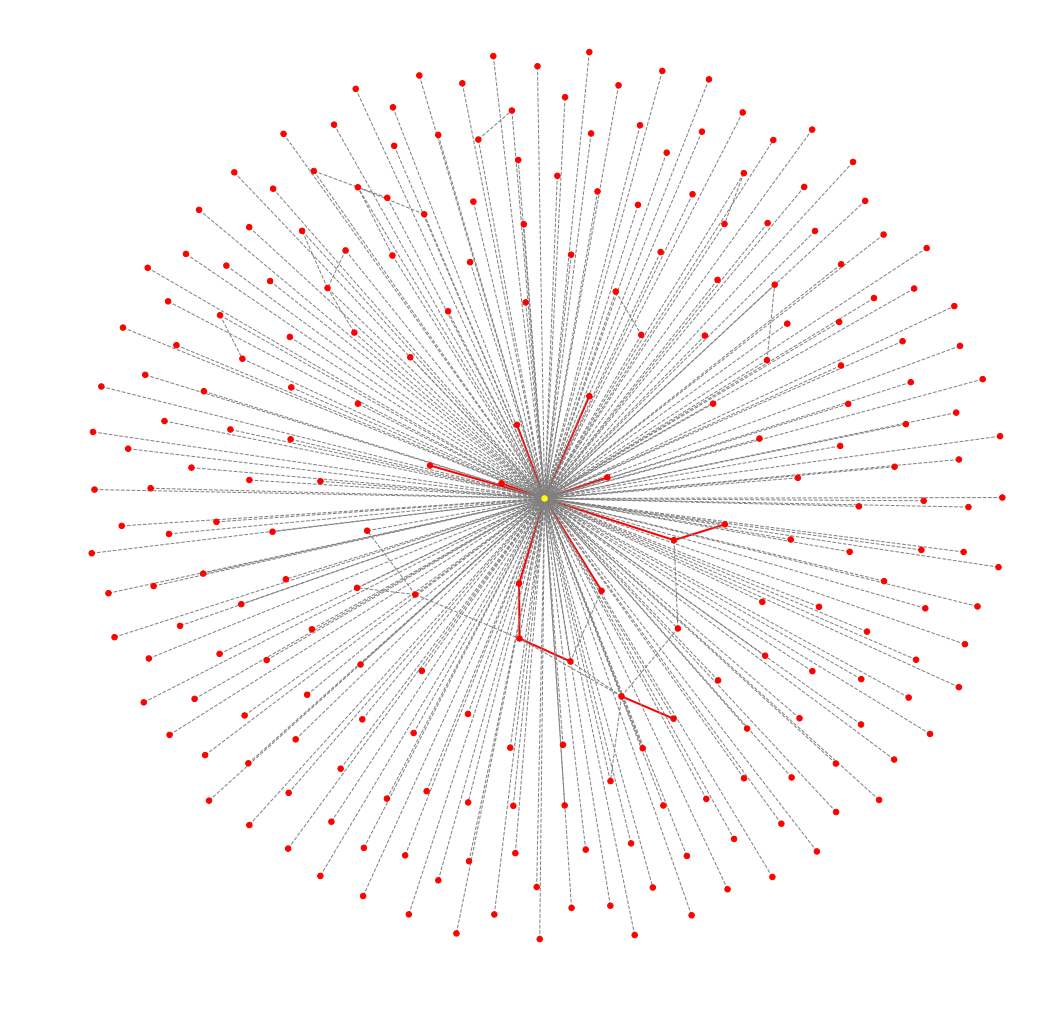

<Figure size 432x288 with 0 Axes>

In [52]:
%matplotlib inline
fig = plt.figure(figsize=(18, 18))

main = 'corby315' #'Bt1222'

# Select neighbors and neighbors of neighbors
subG = G.neighbors(main)

n_list = subG
for n in subG:
    n_list = list(n_list) + [G.neighbors(n)]
n_list = list(set(n_list))
n_list.append(main)

# Isolate the subnetwork
subG = G.subgraph(n_list)

# Get color map
colormap =[]
for n in subG.nodes():
    if n==main:
        colormap.append('yellow')
    else:
        colormap.append('red')
     
# Separate edges by weight - 1 and more than 1
elarge=[(u,v) for (u,v,d) in subG.edges(data=True) if d['weight']>1]
esmall=[(u,v) for (u,v,d) in subG.edges(data=True) if d['weight']==1]

# Layout
pos=nx.spring_layout(subG)

# Draw nodes
nx.draw_networkx_nodes(subG,pos,node_color=colormap,node_size=30)

# Draw edges
nx.draw_networkx_edges(subG, pos, edgelist=elarge, width=2, edge_color='r')
nx.draw_networkx_edges(subG, pos, edgelist=esmall, width=1, edge_color='grey', style='dashed')

plt.axis('off')
plt.show()
plt.gcf().clear()